In [1]:
import lightkurve as lk
tpf = lk.search_targetpixelfile("Kepler-10", quarter=3).download()

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


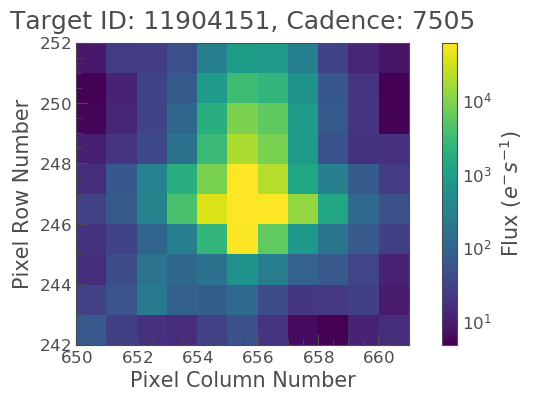

In [2]:
tpf.plot(frame=100, scale='log', show_colorbar=True);

In [3]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

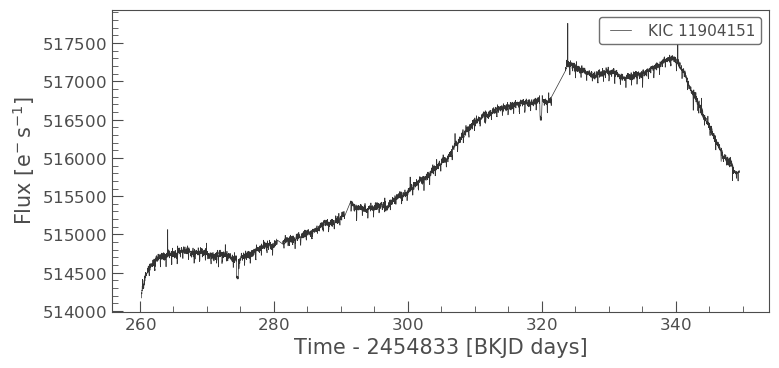

In [4]:
lc.plot();

In [5]:
flat, trend = lc.flatten(window_length=301, return_trend=True)

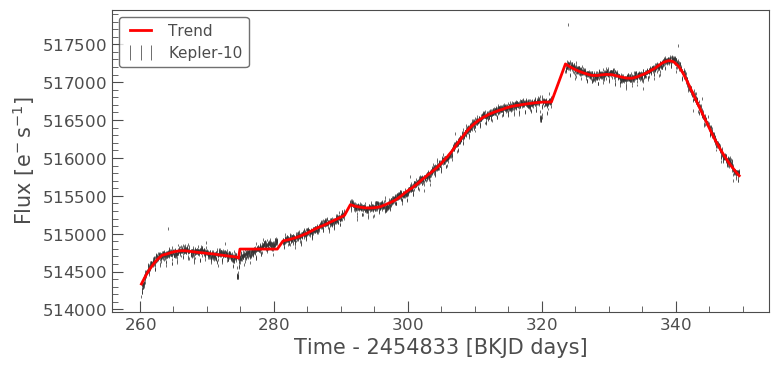

In [6]:
ax = lc.errorbar(label="Kepler-10")                   # plot() returns a matplotlib axes ...
trend.plot(ax=ax, color='red', lw=2, label='Trend');  # which we can pass to the next plot() to use the same axes

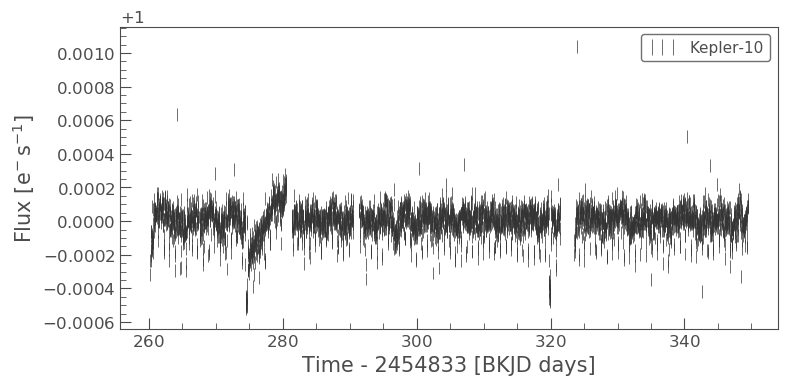

In [7]:
flat.errorbar(label="Kepler-10");

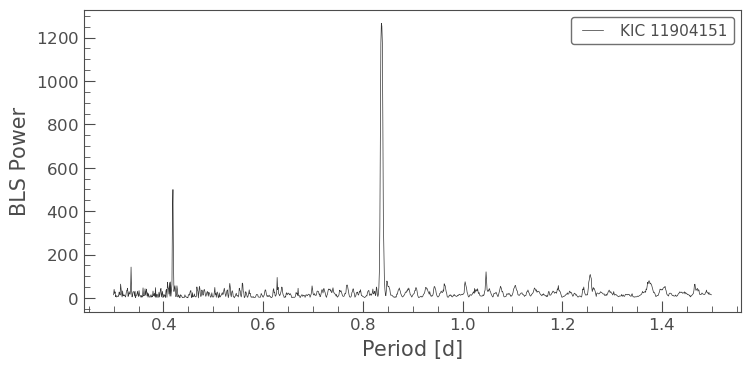

In [8]:
import numpy as np
periodogram = flat.to_periodogram(method="bls", period=np.arange(0.3, 1.5, 0.001))
periodogram.plot();

In [9]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 0.837 d


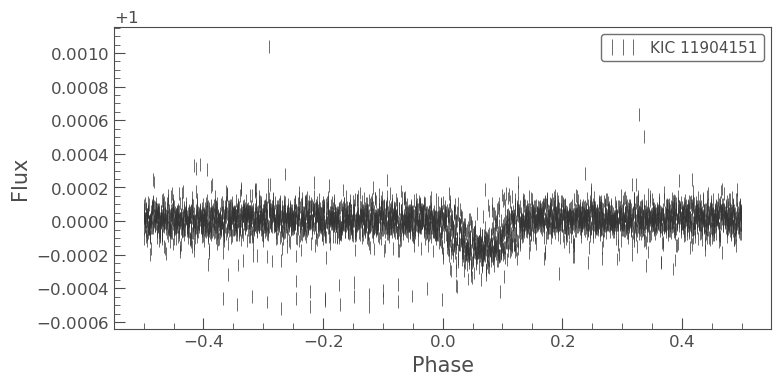

In [10]:
flat.fold(period=best_fit_period, t0=periodogram.transit_time_at_max_power).errorbar();